In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image=cv2.imread("demonstration-image.PNG")

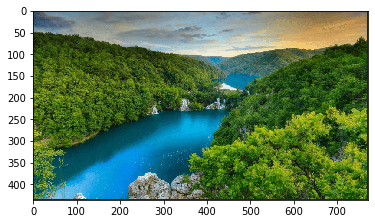

In [18]:
plt.imshow(image)
plt.show()

In [3]:
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
print(image.shape)

(436, 772, 3)


In [5]:
pixel_values=image.reshape((-1,3))

In [6]:
pixel_values = np.float32(pixel_values)

In [7]:
print(pixel_values.shape)

(336592, 3)


In [11]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [12]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [13]:
# convert back to 8 bit values
centers = np.uint8(centers)

In [15]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

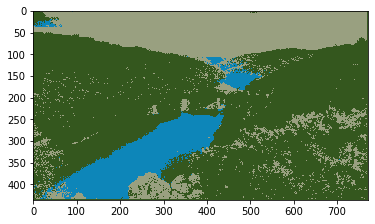

In [16]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

In [19]:
# disable only the cluster number 2
masked_image = np.copy(image)
masked_image[labels == 2] = [0, 0, 0]
# show the image
plt.imshow(masked_image)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 436 but corresponding boolean dimension is 336592